In [19]:
import requests
import pandas as pd

# PL
api_token = 'fe99bf7a91b04b59948cda6eeef8e12c'
url = 'https://api.football-data.org/v4/competitions/BL1/standings'
headers = {'X-Auth-Token': api_token}

# Parameters to select matchday and seasone
params = {
    'season': '2021',
    'matchday': '1'  
}


response = requests.get(url, headers=headers, params=params)


if response.status_code == 200:
    data = response.json()

    
    if 'standings' in data:
       
        all_standings = []
        for standing_type in data['standings']:  
            for entry in standing_type['table']:
                team_info = entry['team']
                all_standings.append({
                    'position': entry['position'],
                    'team_id': team_info['id'],
                    'team_name': team_info['name'],
                    'playedGames': entry['playedGames'],
                    'form': entry['form'],
                    'won': entry['won'],
                    'draw': entry['draw'],
                    'lost': entry['lost'],
                    'points': entry['points'],
                    'goalsFor': entry['goalsFor'],
                    'goalsAgainst': entry['goalsAgainst'],
                    'goalDifference': entry['goalDifference']
                })

        
        standings_df = pd.DataFrame(all_standings)

        
        standings_df.to_csv('BL1', index=False)
        print("Data saved to 'PL_2021_standings.csv'.")
    else:
        print("No 'standings' key found in the JSON response.")
else:
    print("Failed to retrieve data: ", response.status_code)


Data saved to 'PL_2021_standings.csv'.


In [27]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time


api_token = 'fe99bf7a91b04b59948cda6eeef8e12c'
url = 'https://api.football-data.org/v4/competitions/BL1/standings'
headers = {'X-Auth-Token': api_token}


season = '2023'
total_matchdays = 34  


all_standings = []


for matchday in range(1, total_matchdays + 1):
    params = {
        'season': season,
        'matchday': str(matchday)  
    }
    
    
    response = requests.get(url, headers=headers, params=params)
    
    
    if response.status_code == 200:
        data = response.json()
        
        
        if 'standings' in data:
            for standing_type in data['standings']:  
                if standing_type['stage'] == 'REGULAR_SEASON':  
                    for entry in standing_type['table']:
                        
                        if entry['playedGames'] == matchday:
                            team_info = entry['team']
                            all_standings.append({
                                'matchday': matchday,
                                'position': entry['position'],
                                'team_name': team_info['name'],
                                'playedGames': entry['playedGames']
                            })
        
        time.sleep(10)  
    else:
        print(f"Failed to retrieve data for matchday {matchday}: ", response.status_code)
        
        if response.status_code == 429:
            time.sleep(10)  


standings_df = pd.DataFrame(all_standings)


standings_df.to_csv('FL1_2023.csv', index=False)
print("Data saved")


Data saved to 'PL_2021_standings_all_matchdays.csv'.


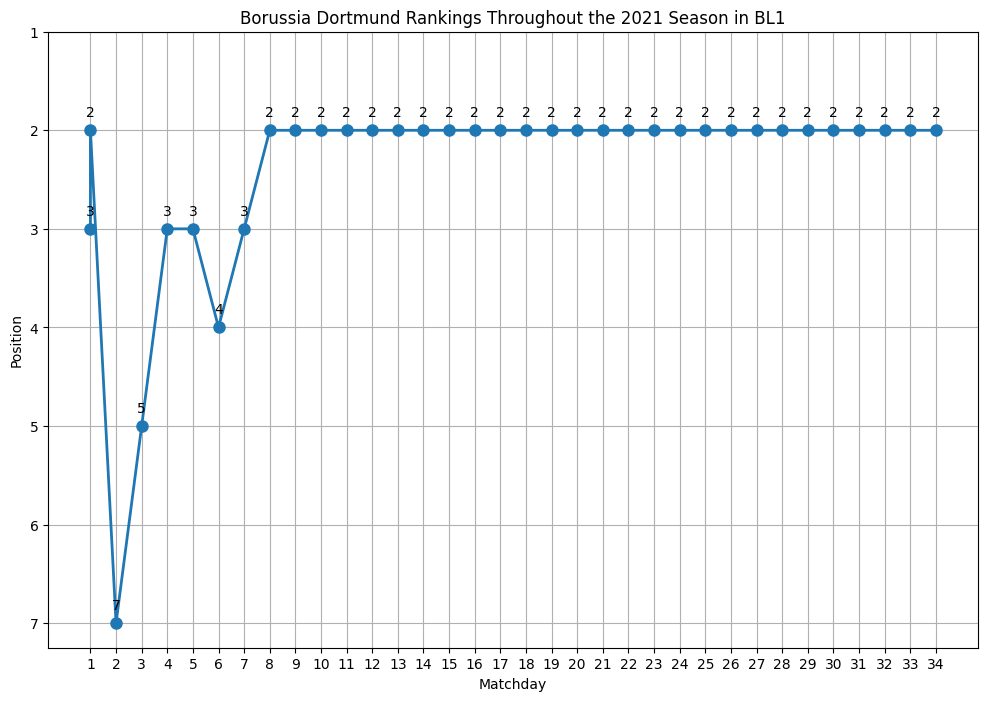

In [24]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time


api_token = 'fe99bf7a91b04b59948cda6eeef8e12c'
headers = {'X-Auth-Token': api_token}


season = '2021'
league_code = 'BL1'  


if league_code in ['PD', 'PL', 'SA']:
    total_matchdays = 38
elif league_code in ['BL1', 'FL1']:
    total_matchdays = 34
else:
    raise ValueError("Unsupported league code")


base_url = 'https://api.football-data.org/v4/competitions'


all_standings = []


for matchday in range(1, total_matchdays + 1):
    url = f'{base_url}/{league_code}/standings'
    params = {
        'season': season,
        'matchday': str(matchday) 
    }
    
   
    response = requests.get(url, headers=headers, params=params)
    
    
    if response.status_code == 200:
        data = response.json()
        
        
        if 'standings' in data:
            for standing_type in data['standings']:  
                if standing_type['stage'] == 'REGULAR_SEASON':  
                    for entry in standing_type['table']:
                        
                        if entry['playedGames'] == matchday:
                            team_info = entry['team']
                            all_standings.append({
                                'matchday': matchday,
                                'position': entry['position'],
                                'team_name': team_info['name'],
                                'playedGames': entry['playedGames'],
                            })
        else:
            print(f"No standings data found for matchday {matchday}")
        
        time.sleep(10)  
    else:
        print(f"Failed to retrieve data for matchday {matchday}: ", response.status_code)
        print(response.text)  
        
        if response.status_code == 429:
            time.sleep(10)  


standings_df = pd.DataFrame(all_standings)

 
team_name = 'Borussia Dortmund' 
team_data = standings_df[standings_df['team_name'] == team_name]

if not team_data.empty:
    plt.figure(figsize=(12, 8))
    plt.plot(team_data['matchday'], team_data['position'], marker='o', linestyle='-', linewidth=2, markersize=8)
    
    
    for idx, row in team_data.iterrows():
        plt.annotate(row['position'], (row['matchday'], row['position']), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.gca().invert_yaxis() 
    plt.title(f"{team_name} Rankings Throughout the 2021 Season in {league_code}")
    plt.xlabel("Matchday")
    plt.ylabel("Position")
    plt.grid(True)
    plt.xticks(range(1, total_matchdays + 1))  
    plt.yticks(range(1, max(team_data['position']) + 1)) 
    plt.show()
else:
    print(f"No data found for team {team_name}")

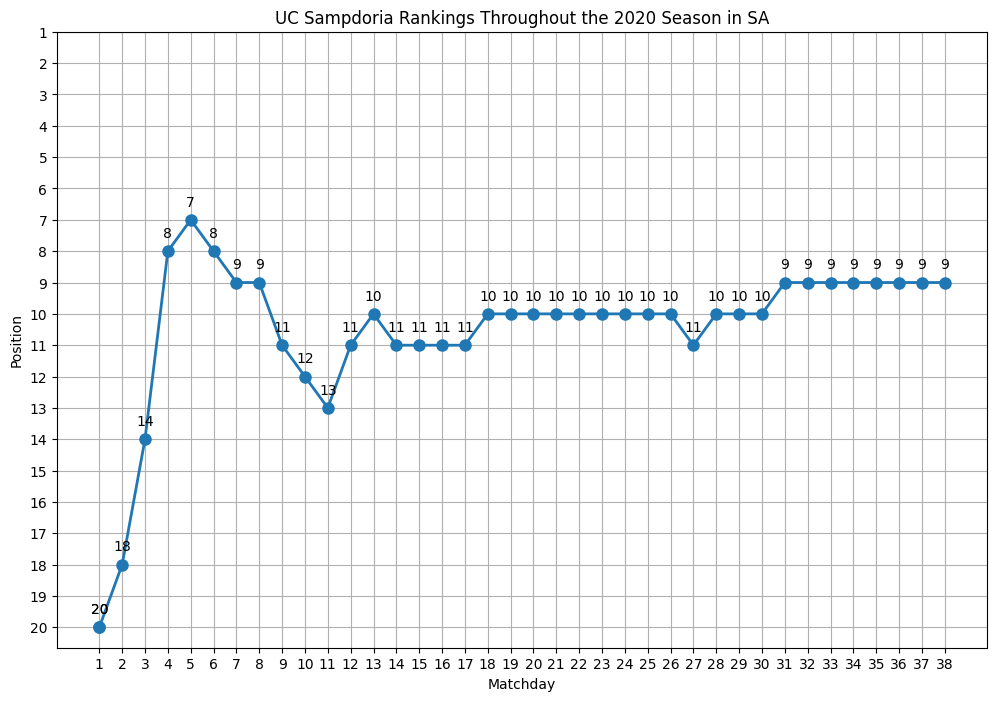

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Parameters to select the season and league
season = '2020'
league_code = 'SA'  
team_name = 'UC Sampdoria'

if league_code in ['PD', 'PL', 'SA']:
    total_matchdays = 38
elif league_code in ['BL1', 'FL1']:
    total_matchdays = 34
else:
    raise ValueError("Unsupported league code")


file_path = f'data/{league_code}_{season}.csv'


standings_df = pd.read_csv(file_path)

team_data = standings_df[standings_df['team_name'] == team_name]

if not team_data.empty:
    plt.figure(figsize=(12, 8))
    plt.plot(team_data['matchday'], team_data['position'], marker='o', linestyle='-', linewidth=2, markersize=8)
    
   
    for idx, row in team_data.iterrows():
        plt.annotate(row['position'], (row['matchday'], row['position']), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.gca().invert_yaxis() 
    plt.title(f"{team_name} Rankings throughout the {season} Season in {league_code}")
    plt.xlabel("Matchday")
    plt.ylabel("Position")
    plt.grid(True)
    plt.xticks(range(1, total_matchdays + 1)) 
    plt.yticks(range(1, max(team_data['position']) + 1))  
    plt.show()
else:
    print(f"No data found for team {team_name}")
